In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

In [2]:
def format_ticks(y, _):
        # Format with 2 decimals
        s = f'{y:.2f}'
        # Remove trailing zeros and dot if needed
        if '.' in s:
            s = s.rstrip('0').rstrip('.')
        # Remove leading zero before decimal point
        if s.startswith('0.') or s.startswith('-0.'):
            s = s.replace('0.', '.')
        return s

In [5]:
medoid_df = pd.read_csv("/home/wollerf/Projects/GRN-FinDeR_Results.git/results/manuscript/breast_testis_kidney/medoid_tfs_correlation_results.csv")
random_df = pd.read_csv("/home/wollerf/Projects/GRN-FinDeR_Results.git/results/manuscript/breast_testis_kidney/random_tfs_correlation_results.csv")
medoid_df

,tissue,num_non_tfs,num_tfs,mae,f1_005,f1_001,abs_time_saving,rel_time_saving,abs_emission_saving,rel_emission_saving,total_runtime
0,Breast,200,1,0.955418,0.000000,0.000000,320184.366513,83.852384,12.606440,151.436237,3864.516032
1,Breast,200,2,0.955411,0.000000,0.000000,320005.585491,80.144713,12.601141,142.429757,4043.297054
2,Breast,200,3,0.955343,0.000011,0.000019,320277.523217,85.923630,12.606211,151.024163,3771.359328
3,Breast,200,4,0.954947,0.000027,0.000044,320221.553188,84.667101,12.608602,155.447318,3827.329357
4,Breast,200,5,0.953174,0.000319,0.000339,320142.944149,82.963132,12.608210,154.705452,3905.938396
...,...,...,...,...,...,...,...,...,...,...,...
94,Testis,200,1100,0.024407,0.709785,0.827180,327738.528579,83.989287,12.988250,95.044240,3949.166718
95,Testis,200,1200,0.021124,0.751080,0.844994,327123.002947,72.663757,12.977647,88.267638,4564.692349
96,Testis,200,1300,0.018192,0.785046,0.855012,325674.181329,55.157051,12.948720,73.893985,6013.513968
97,Testis,200,1400,0.016578,0.809441,0.862011,327777.243402,84.820810,12.978934,89.038196,3910.451895


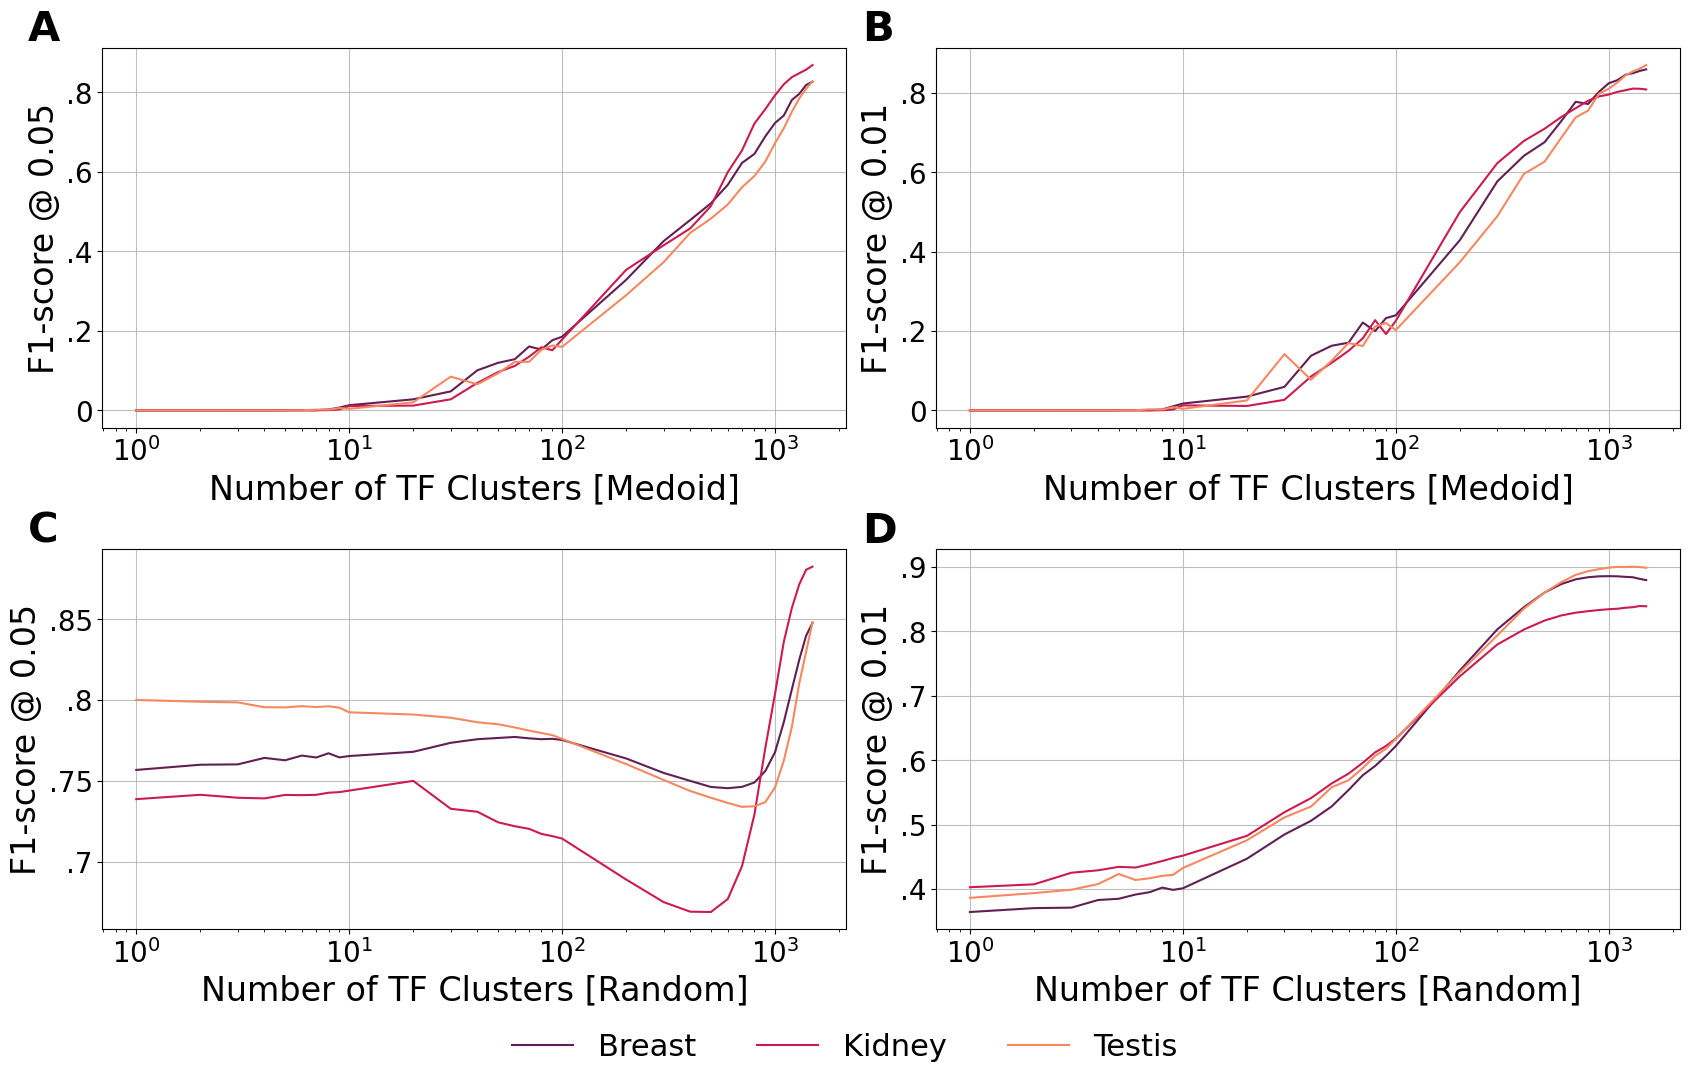

In [14]:
# Create one large mosaic plot.
fig, axs = plt.subplot_mosaic([['A', 'A', 'B', 'B'], ['C', 'C', 'D', 'D']])
fig.set_size_inches(17, 11)
axs_list = list(axs.values())
label_fontsize = 24
    
sns.lineplot(data=medoid_df, x='num_tfs', y='f1_005', hue="tissue", ax=axs['A'], legend=True, palette="rocket")
axs['A'].set_xlabel('Number of TF Clusters [Medoid]', fontsize=label_fontsize)
axs['A'].set_ylabel('F1-score @ 0.05', fontsize=label_fontsize)
axs['A'].tick_params(axis='x', labelsize=label_fontsize-4)
axs['A'].tick_params(axis='y', labelsize=label_fontsize-4)
formatter = FuncFormatter(format_ticks)
axs['A'].yaxis.set_major_formatter(formatter)
axs['A'].grid(True, alpha=0.8)
axs['A'].set_xscale('log')

    
sns.lineplot(data=medoid_df, x='num_tfs', y='f1_001', ax=axs['B'], hue="tissue", legend=False, palette="rocket")
#axs['B'].set_title('Significance Level of 0.01', fontsize=label_fontsize)
axs['B'].set_xlabel('Number of TF Clusters [Medoid]', fontsize=label_fontsize)
axs['B'].set_ylabel('F1-score @ 0.01', fontsize=label_fontsize)
axs['B'].tick_params(axis='x', labelsize=label_fontsize-4)
axs['B'].tick_params(axis='y', labelsize=label_fontsize-4)
formatter = FuncFormatter(format_ticks)
# Apply to y-axis
axs['B'].yaxis.set_major_formatter(formatter)
axs['B'].grid(True, alpha=0.8)
axs['B'].set_xscale('log')

sns.lineplot(data=random_df, x='num_tfs', y='f1_005', ax=axs['C'], hue="tissue", legend=False, palette="rocket")
#axs['B'].set_title('Significance Level of 0.01', fontsize=label_fontsize)
axs['C'].set_xlabel('Number of TF Clusters [Random]', fontsize=label_fontsize)
axs['C'].set_ylabel('F1-score @ 0.05', fontsize=label_fontsize)
axs['C'].tick_params(axis='x', labelsize=label_fontsize-4)
axs['C'].tick_params(axis='y', labelsize=label_fontsize-4)
formatter = FuncFormatter(format_ticks)
# Apply to y-axis
axs['C'].yaxis.set_major_formatter(formatter)
axs['C'].grid(True, alpha=0.8)
axs['C'].set_xscale('log')

sns.lineplot(data=random_df, x='num_tfs', y='f1_001', ax=axs['D'], hue="tissue", legend=False, palette="rocket")
#axs['B'].set_title('Significance Level of 0.01', fontsize=label_fontsize)
axs['D'].set_xlabel('Number of TF Clusters [Random]', fontsize=label_fontsize)
axs['D'].set_ylabel('F1-score @ 0.01', fontsize=label_fontsize)
axs['D'].tick_params(axis='x', labelsize=label_fontsize-4)
axs['D'].tick_params(axis='y', labelsize=label_fontsize-4)
formatter = FuncFormatter(format_ticks)
# Apply to y-axis
axs['D'].yaxis.set_major_formatter(formatter)
axs['D'].grid(True, alpha=0.8)
axs['D'].set_xscale('log')
 
labels = {'A': 'A', 'B': 'B', 'C': 'C', 'D' : 'D'}

for key, label in labels.items():
    ax = axs[key]
    ax.text(
        -0.1, 1.1, label,  # x, y (in axes fraction coords)
        transform=ax.transAxes,
        fontsize=30,
        fontweight='bold',
        va='top',
        ha='left'
    )
    
fig.tight_layout()
#fig.subplots_adjust(hspace=0.4, wspace=0.3)
handles, labels = axs['A'].get_legend_handles_labels()
axs['A'].legend_.remove()  # Remove local legend
fig.legend(handles, labels, loc='lower center', ncol=len(labels), fontsize=label_fontsize-2, frameon=False)
fig.subplots_adjust(bottom=0.15)
#plt.show()
plt.savefig("supplement_tf_clustering.pdf", format='pdf')